# Classification d'images

### Imports

In [30]:
# Pandas & numpy pour la manipulation des donnees
import pandas as pd
import numpy as np

#division des donnees en training & testing
from sklearn.model_selection import train_test_split

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# taille de police par defaut
plt.rcParams['font.size'] = 24

# taille de figures
from IPython.core.pylabtools import figsize

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Models d'aprentissage machine
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Mise à jour des hyperparametres
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



### Charger les données et afficher une partie

In [31]:
train_images = np.load("./train_images.npy", encoding='latin1')
print("Training image type    : ",train_images.dtype)
train_images= pd.DataFrame(data=train_images, index=None, columns=None, dtype=None, copy=False)
train_labels = pd.read_csv("train_labels.csv")
test_images = np.load("./test_images.npy", encoding='latin1')
test_images = pd.DataFrame(data=test_images, index=None, columns=None, dtype=None, copy=False)

#Informations sur les données d'entrainement
print("Training image shape   : ",train_images.shape)
train_images.head(10)

Training image type    :  object
Training image shape   :  (10000, 2)


,0,1
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [32]:
print("Training labels' shape : ",train_labels.shape)
train_labels.head(10)

Training labels' shape :  (10000, 2)


,Id,Category
0,0,shovel
1,1,rifle
2,2,scorpion
3,3,apple
4,4,spoon
5,5,pineapple
6,6,rifle
7,7,mouth
8,8,skateboard
9,9,rollerskates


In [33]:
print("Testing images shape : ",test_images.shape)
train_images.head(10)

Testing images shape :  (10000, 2)


,0,1
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Echantillion : Examiner une image redimensionnée

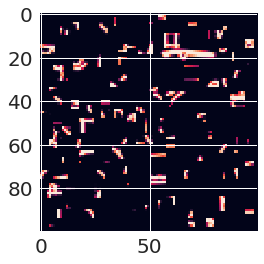

In [34]:
#Image shape
train_image1       = (train_images[1][1]).reshape(100,100)
plt.imshow(train_image1)

### Sauvegarder en csv


In [35]:
train_images.to_csv('./training_features.csv', index = False)
test_images.to_csv('./testing_features.csv', index = False)

In [47]:
# lire les données et les mettre en dataframe 
train_features = pd.read_csv('./training_features.csv')#X
test_features = pd.read_csv('./testing_features.csv')#X_test
train_labels = pd.read_csv('./train_labels.csv')

### Recherches des valeur manquantes

In [43]:
#imputer = Imputer(strategy='median') ERREUR TYPE
#imputer.fit(train_features[1:][1:])
#X = imputer.transform(train_features)
#X_test = imputer.transform(test_features)

In [44]:
#print('Valeurs manquantes dans les donnees d entrainement : ', np.sum(np.isnan(X)))
#print('Valeurs manquantes dans les donnees de test : ', np.sum(np.isnan(X_test)))

In [45]:
#s'assurer que toutes les valeurs sont finies
#print(np.where(~np.isfinite(X)))
#print(np.where(~np.isfinite(X_test)))

### Normalisation des donnees :

La normalisation des données est une etape importante dans la preparation des données dans l'aprentissage automatique. Elle a pour objectif de les valeurs des colonnes numériques dans la dataset afin d'utiliser une échelle commune,sans distoiotsion des difference dans les intervalles des valeur ni perte d'informations.

In [50]:
#Creation d'un objet de normalization dans un intervalle de 0-1
#scaler = MinMaxScaler(feature_range=(0, 1))

# Fitting les donnees d'entrainement
#scaler.fit(X)

# Transformation des donnees d'entrainement et de Test
#X = scaler.transform(X)
#X_test = scaler.transform(X_test)

NameError: name 'X' is not defined